This runs the network creation in parallel.

Please run in a terminal on your computer, in the examples/notebook directory:

```
export IPYTHONDIR="`pwd`/.ipython"
export IPYTHON_PROFILE=Snudda_LOCAL
ipcluster start
```

These commands are in ```start_ipcluster.sh``` in the examples/notebook directory. After starting ipcluster give it a few seconds to get fully up and running before proceeding with the rest of the commands in this notebook.

For instructions how to install and activate ipyparallel for your notebook see 
https://github.com/ipython/ipyparallel

In [1]:
import os

os.environ["IPYTHONDIR"] = ".ipython"
os.environ["IPYTHON_PROFILE"] = "Snudda_LOCAL"

In [2]:
from snudda.init import SnuddaInit

network_path = os.path.join("networks","simple_example_parallel")
config_file = os.path.join(network_path, "network-config.json")
cnc = SnuddaInit(struct_def={}, config_file=config_file, num_population_units=1)
cnc.define_striatum(num_dSPN=200, num_iSPN=200, num_FS=4, num_LTS=0, num_ChIN=0,
                    volume_type="cube", cell_spec_dir="../../snudda/data/neurons")
cnc.write_json(config_file)

CreateConfig
Seeding with rand_seed=None
Random seed init to 1708402283
Random seed place to 3908560368
Random seed detect to 1262264847
Random seed prune to 2758973006
Random seed input to 2496652464
Random seed simulate to 2083838515
Overriding the number of population units
Using 1 Population Units
No structDef defined, not writing JSON file in init
Using cube for striatum
Creating cube mesh
File: networks/simple_example_parallel/mesh/Striatum-cube-mesh-0.00017120975070990257.obj
Centre: [0.00354  0.004645 0.005081]
Side: 0.00017120975070990257
Description: Striatum cube mesh, centre: [0.00354  0.004645 0.005081], side: 0.00017120975070990257
Adding neurons: FSN from dir ../../snudda/data/neurons/striatum/fs
Adding neurons: dSPN from dir ../../snudda/data/neurons/striatum/dspn
Adding neurons: iSPN from dir ../../snudda/data/neurons/striatum/ispn
Writing networks/simple_example_parallel/network-config.json


In [3]:
from ipyparallel import Client
u_file = os.path.join(".ipython", "profile_Snudda_LOCAL", "security", "ipcontroller-client.json")
rc = Client(url_file=u_file, timeout=120, debug=False)
d_view = rc.direct_view(targets='all')  # rc[:] # Direct view into clients


Passing valid rc parameter to SnuddaDetect will lead to parallel execution.
When we use network_path as parameter we assume the config file is in that directory and named ```network-config.json```

In [4]:
from snudda.place import SnuddaPlace
position_file = os.path.join(network_path, "network-neuron-positions.hdf5")
sp = SnuddaPlace(network_path=network_path, rc=rc)
sp.read_config()
sp.write_data(position_file)

Using hdf5 version: latest
Parsing configuration file networks/simple_example_parallel/network-config.json
Reading random see from config file: 3908560368
Using mesh_bin_width 0.00017120975070990257
Cube mesh, switching to serial processing.
No mesh cache file found (networks/simple_example_parallel/mesh/Striatum-cube-mesh-0.00017120975070990257.obj-171-cache.pickle)
Running in serial
Voxel mask: 5x5x5
Processing x = 0
Processing x = 1
Processing x = 2
Processing x = 3
Processing x = 4
Fraction of border voxels: 0.0
Saving mesh cache file networks/simple_example_parallel/mesh/Striatum-cube-mesh-0.00017120975070990257.obj-171-cache.pickle
Calculation time: 0.026892399007920176 s
Setup voxel list
Setup place neurons
Update padding mask
Regenerating new random pool
Setup done
Inner voxel bin volume: 0.0 mm³
Using dimensions from config file
Adding: 1 FSN_0
Found cache file: ../../snudda/data/neurons/striatum/fs/str-fs-e160628_FS2-mMTC180800A-IDB-v20190226/MTC180800A-IDB-cor-rep-cache.pick

In [5]:
from snudda.detect import SnuddaDetect

sd = SnuddaDetect(network_path=network_path, rc=rc)
sd.detect()

Using hdf5 driver version: latest
Memory: 59763286016 free, 67218092032 total
Each hyper voxel has 100 x 100 x 100 voxels
Touch detecting all volumes
Loading from networks/simple_example_parallel/network-config.json
Reading random seed from config file: 1262264847
Reading prototype for: FSN_0
Found cache file: ../../snudda/data/neurons/striatum/fs/str-fs-e160628_FS2-mMTC180800A-IDB-v20190226/MTC180800A-IDB-cor-rep-cache.pickle
Reading prototype for: FSN_1
Found cache file: ../../snudda/data/neurons/striatum/fs/str-fs-e161205_FS1-mMTC180800A-IDB-v20190312/MTC180800A-IDB-cor-rep-cache.pickle
Reading prototype for: FSN_2
Found cache file: ../../snudda/data/neurons/striatum/fs/str-fs-e180418_FS5-mMTC251001A-IDB-v20190301/MTC251001A-IDB-cor-rep-cache.pickle
Reading prototype for: FSN_3
Found cache file: ../../snudda/data/neurons/striatum/fs/str-fs-e161024_FS16-mDR-rat-Mar-13-08-1-536-R-v20190225/DR-rat-Mar-13-08-1-536-R-cor-rep-cache.pickle
Reading prototype for: dSPN_0
Found cache file: ..

In the folder ```networks/simple_example_parallel/log/``` you can find log files for touch detection. The file ```logFile-touch-detection.txt``` is the master node log, and the files ```logFile-touch-detection.txt-0``` up to ```n``` are the different worker logs where you can see what they are doing, since they do not print their output to stdout.

In [6]:
from snudda.prune import SnuddaPrune

sp = SnuddaPrune(network_path=network_path, rc=rc)
sp.prune()

Log file networks/simple_example_parallel/log/logFile-synapse-pruning.txt created.
Random seed: None
Using hdf5 driver sec2, latest version
Opening work history file: networks/simple_example_parallel/log/network-detect-worklog.hdf5
Reading random seed from config file: 2758973006
Using default scratch path: networks/simple_example_parallel/temp
Skipping FSN to LTS connection
Skipping dSPN to ChIN connection
Skipping iSPN to ChIN connection
Skipping LTS to dSPN connection
Skipping LTS to iSPN connection
Skipping LTS to ChIN connection
Checking for merge file networks/simple_example_parallel/network-putative-synapses-MERGED.hdf5
Running parallel merge
big_merge_parallel, starting master
importing SnuddaPrune from snudda.prune on engine(s)
Setting up workers: 2021-02-22 09:55:29
Workers setup: 2021-02-22 09:55:29
Processing merge...
Setting up out file networks/simple_example_parallel/network-putative-synapses-MERGED.hdf5
Saving morphology in HDF5 file: ../../snudda/data/neurons/striatum/

Loading networks/simple_example_parallel/network-pruned-synapses.hdf5
Loading config data from HDF5
404 neurons with 82137 synapses and 2 gap junctions
Load done. 0.05105187802109867
Found cache file: ../../snudda/data/neurons/striatum/dspn/str-dspn-e150602_c1_D1-mWT-0728MSN01-v20190508/WT-0728MSN01-cor-rep-ax-cache.pickle
Found cache file: ../../snudda/data/neurons/striatum/ispn/str-ispn-e151123_c1_D2-mWT-P270-09-v20190527/WT-P270-09-15ak-cor-cache.pickle
Found cache file: ../../snudda/data/neurons/striatum/ispn/str-ispn-e150908_c4_D2-m51-5-DE-v20190611/51-5-DE-cor-rep-ax-cache.pickle
Found cache file: ../../snudda/data/neurons/striatum/ispn/str-ispn-e160118_c10_D2-m46-3-DE-v20190529/46-3-DE-cor-rep-ax-cache.pickle
Found cache file: ../../snudda/data/neurons/striatum/dspn/str-dspn-e150917_c6_D1-m21-6-DE-v20190503/21-6-DE-cor-rep-ax-cache.pickle
Found cache file: ../../snudda/data/neurons/striatum/dspn/str-dspn-e150917_c9_d1-mWT-1215MSN03-v20190521/WT-1215MSN03-cor-rep-ax2-cache.pickle

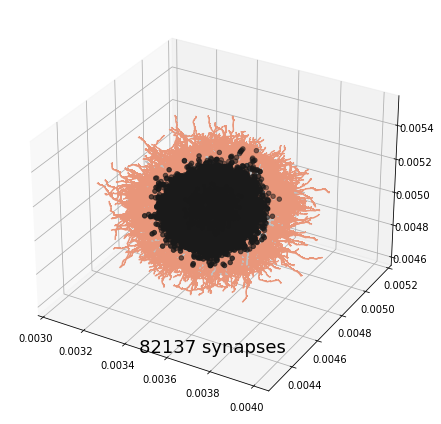

In [7]:
from snudda.plotting.plot_network import PlotNetwork
network_file = os.path.join(network_path, "network-pruned-synapses.hdf5")
pn = PlotNetwork(network_file)
pn.plot()
pn.close()  # Close the hdf5 file so others can use it